# Tarea 8.7

Encuentre la separación óptima entre puntos para el ejemplo con ruido hecho en clase.

A continuación mostraremos el código de ruido mostrado en clase.

Las derivadas numéricas sufren de una inestabilidad respecto a los errores de redondeo. Para verlo consideremos la fórmula a tres puntos y supongamos que el error de redondeo (o un error de la simulación) está acotado por un valor $e$ y $f(x) = \tilde{f}(x) + e(x)$ donde $\tilde{f}$ es el verdadero valor, tal que $e(x) \leq e$. Entonces

$$
\left|f'(x_o) - \frac{1}{2h}\left(f(x_o + h) - f(x_o - h)\right)\right| \leq \left|\frac{1}{2h}(e(x_o + h) - e(x_o - h))\right| + \frac{h^2}{6} M \leq \frac{e}{h} + \frac{h^2}{6} M
$$

¡Al disminuir $h$ aumentamos el primer término de este error!

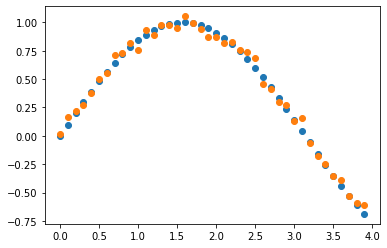

In [27]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 4, 0.1)
datos_r = np.sin(x) + np.random.normal(0, 0.05, 40)
datos_e = np.sin(x)
plt.scatter(x, datos_e)
plt.scatter(x, datos_r)

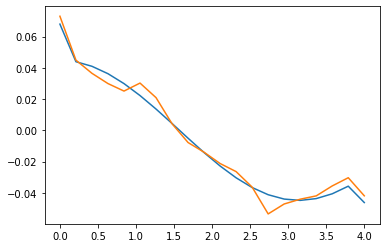

In [32]:
def deriv3_datos(fxo, fx2, h):
    return (fx2 - fxo)/(2*h)

def deriv3_borde_datos(fxo, fx1, fx2, h):
    return (-3*fxo + 4*fx1 - fx2)/(2*h)

def deriv_datos(fx, h):
    
    n = len(fx)
    deriv = np.zeros(n)
    for i in range(n):
        if i == 0:
            deriv[i] = deriv3_borde_datos(fx[0], fx[1], fx[2], h)
        elif i == n - 1:
            deriv[i] = deriv3_borde_datos(fx[n-1], fx[n-2], fx[n-3], -h)
        else:
            deriv[i] = deriv3_datos(fx[i-1], fx[i+1], h)
    return deriv
    return (fx2 - fxo)/(2*h)
num = 20
x = np.linspace(0, 4, num)
h = 4/num
datos_e = np.sin(x)
datos_r = np.sin(x) + np.random.normal(0, 0.001, num)
plt.plot(x, deriv_datos(datos_e, h) - np.cos(x))
plt.plot(x, deriv_datos(datos_r, h) - np.cos(x))

la función:
$$
\left|f'(x_o) - \frac{1}{2h}\left(f(x_o + h) - f(x_o - h)\right)\right| \leq \left|\frac{1}{2h}(e(x_o + h) - e(x_o - h))\right| + \frac{h^2}{6} M \leq \frac{e}{h} + \frac{h^2}{6} M
$$
Está acotada superiormente por $\frac{e}{h} + \frac{h^2}{6}M$, por lo que se buscará un intervalo "h" tal que minimize el rango de error de esta función. Es sabido que al disminuir "h" el error se disminuye, pero se llegará a un punto en el que el factor $\frac{e}{h}$ comenzará a incrementar en mayor grado en el que decrece $\frac{h^2}{6} M$. Ahora ¿Cuál sería el mínimo valor que puede tomar h?

In [34]:
M=1                         #Tomaremos M=1, ya que M es el maximo valor de la tercera derivada, osea
                            #-sen(x), cuyo máximo malor es 1.
rango=100*np.abs(M)         #rango que usaremos para obtener distintos valores de h.
minimo=rango     #Definimos la variariable minimo con un valor arbritraio y reemplazable mediante el código.
for i in range(1, rango*1000):
    h=rango/i                #Intervalo h siempre positivo, ya que rango>0
    if minimo>0.001/h+M*(h**2)/6:  #Buscamos un nuevo mínimo en cada evaluación 
        minimo=h
print(minimo)                #Obtenemos el mínimo valor del intervalo para un M=1

0.03170577045022194


Ahora evaluaremos en la derivada implementada en clases.

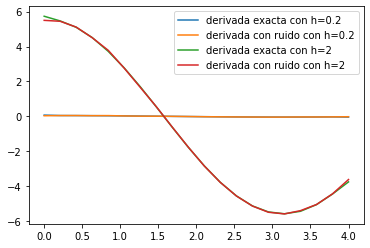

In [36]:
num = 20                                                     #Derivada vista en clases
x = np.linspace(0, 4, num)
h = 4/num                           #h=0.2
datos_e = np.sin(x)
datos_r = np.sin(x) + np.random.normal(0, 0.001, num)
plt.plot(x, deriv_datos(datos_e, h) - np.cos(x), label='derivada exacta con h=0.2')
plt.plot(x, deriv_datos(datos_r, h) - np.cos(x), label='derivada con ruido con h=0.2')

#Derivada con h casi mínimo 
num = 20                                                  
x = np.linspace(0, 4, num)
h = 0.03170577045022194                                               
plt.plot(x, deriv_datos(datos_e, h) - np.cos(x), label='derivada exacta con h=2')
plt.plot(x, deriv_datos(datos_r, h) - np.cos(x), label='derivada con ruido con h=2')
plt.legend()
plt.show()


### Nuevo intento de realizar esta Tarea

la función:
$$
\left|f'(x_o) - \frac{1}{2h}\left(f(x_o + h) - f(x_o - h)\right)\right| \leq \left|\frac{1}{2h}(e(x_o + h) - e(x_o - h))\right| + \frac{h^2}{6} M \leq \frac{e}{h} + \frac{h^2}{6} M
$$
Está acotada superiormente por $\frac{e}{h} + \frac{h^2}{6}M$, por lo que se buscará un intervalo "h" tal que minimize el rango de error de esta función. Es sabido que al disminuir "h" el error se disminuye, pero se llegará a un punto en el que el factor $\frac{e}{h}$ comenzará a incrementar en mayor grado en el que decrece $\frac{h^2}{6} M$. Ahora ¿Cuál sería el mínimo valor que puede tomar h?

In [4]:
M=1                         #Tomaremos M=1, ya que M es el maximo valor de la tercera derivada, osea
                            #-sen(x), cuyo máximo malor es 1.
rango=100*np.abs(M)         #rango que usaremos para obtener distintos valores de h.
minimo=rango     #Definimos la variariable mínimo con un valor arbritraio y reemplazable mediante el código.
for i in range(1, rango*1000):
    h=rango/i                #Intervalo h siempre positivo, ya que rango>0
    if minimo>0.05/h+M*(h**2)/6:  #Buscamos un nuevo mínimo en cada evaluación con, e=0.05 dado por la
        minimo=h                 #la desviación estandar de la normal asociada al ruido de la función.
print(minimo)                #Obtenemos el mínimo valor del intervalo para un M=1

0.22779043280182232


Ahora evaluaremos en la derivada implementada en clases.

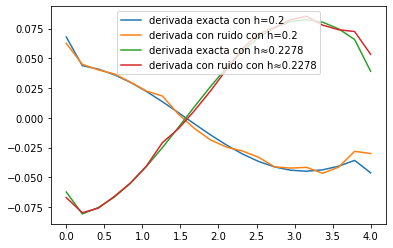

In [38]:
num = 20                                                     #Derivada vista en clases
x = np.linspace(0, 4, num)
h = 4/num                           #h=0.2
datos_e = np.sin(x)
datos_r = np.sin(x) + np.random.normal(0, 0.001, num)
plt.plot(x, deriv_datos(datos_e, h) - np.cos(x), label='derivada exacta con h=0.2')
plt.plot(x, deriv_datos(datos_r, h) - np.cos(x), label='derivada con ruido con h=0.2')

#Derivada con h casi mínimo 
num = 20                                                  
x = np.linspace(0, 4, num)
h = 0.22779043280182232       
plt.plot(x, deriv_datos(datos_e, h) - np.cos(x), label='derivada exacta con h≈0.2278')
plt.plot(x, deriv_datos(datos_r, h) - np.cos(x), label='derivada con ruido con h≈0.2278')
plt.legend()
plt.show()

# Calificación: 7.0